# NNFS – Chapter 3: Training Data

In this notebook we follow along with the **Training Data** section of *Neural Networks from Scratch*.

We will:
- Visualize simple **linear** vs **non‑linear** data in 1D.
- See why a straight line is a good model for linear data but a bad model for non‑linear data.
- Generate a 2D **spiral** dataset using the `nnfs` package, which we will use later for classification.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=5, suppress=True)

## 1. Linear vs non‑linear data

If a relationship between $x$ and $y$ can be well approximated by a straight line,
we call it **linear**. Otherwise, it is **non‑linear**.

We'll build two synthetic datasets:

1. A roughly linear relationship:  
   $y = 0.7x + 2 + \text{noise}$

2. A non‑linear relationship:  
   $y = 2\sin(x) + 0.3x + \text{noise}$

Then we'll fit the **best straight line** (least‑squares line) to each and see
how good or bad that fit looks.

### 1.1 Linear data with a straight‑line fit

Fitted line (linear data): y = 0.668x + 2.126


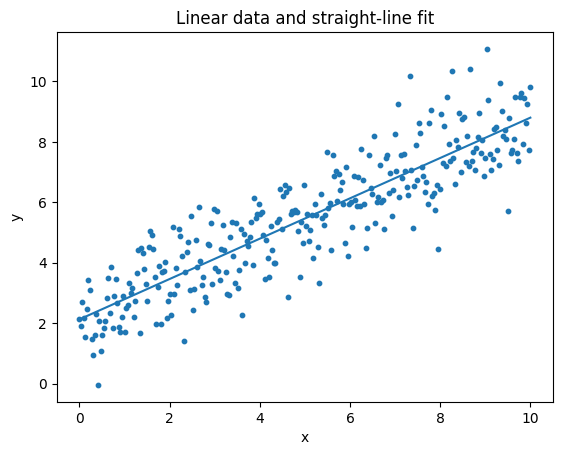

In [2]:
# Generate approximately linear data
rng = np.random.default_rng(0)
x_linear = np.linspace(0, 10, 300)
y_linear_true = 0.7 * x_linear + 2.0
noise_linear = rng.normal(loc=0.0, scale=1.0, size=x_linear.shape)
y_linear = y_linear_true + noise_linear

# Fit a straight line y = ax + b using least squares
coeffs = np.polyfit(x_linear, y_linear, deg=1)
a_fit, b_fit = coeffs
y_fit_linear = a_fit * x_linear + b_fit

print(f"Fitted line (linear data): y = {a_fit:.3f}x + {b_fit:.3f}")

# Plot data and fitted line
plt.figure()
plt.scatter(x_linear, y_linear, s=10)
plt.plot(x_linear, y_fit_linear)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear data and straight‑line fit")
plt.show()

### 1.2 Non‑linear data with a straight‑line fit

Fitted line (non‑linear data): y = 0.258x + 0.503


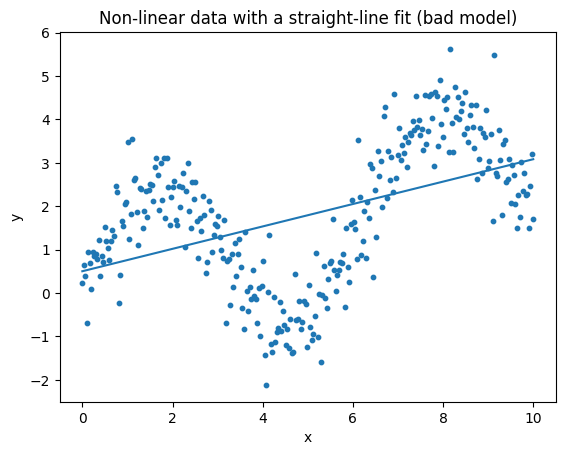

In [3]:
# Generate clearly non‑linear data
rng = np.random.default_rng(1)
x_nl = np.linspace(0, 10, 300)
y_nl_true = 2.0 * np.sin(x_nl) + 0.3 * x_nl
noise_nl = rng.normal(loc=0.0, scale=0.7, size=x_nl.shape)
y_nl = y_nl_true + noise_nl

# Fit a straight line anyway
coeffs_nl = np.polyfit(x_nl, y_nl, deg=1)
a_fit_nl, b_fit_nl = coeffs_nl
y_fit_nl = a_fit_nl * x_nl + b_fit_nl

print(f"Fitted line (non‑linear data): y = {a_fit_nl:.3f}x + {b_fit_nl:.3f}")

plt.figure()
plt.scatter(x_nl, y_nl, s=10)
plt.plot(x_nl, y_fit_nl)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Non‑linear data with a straight‑line fit (bad model)")
plt.show()

In the first plot, the straight line tracks the data quite well.
In the second plot, the data clearly curve and wiggle away from the fitted line.

Simple linear models are great for linear relationships but struggle on highly non‑linear patterns.
Neural networks shine on these more complex datasets.

## 2. Non‑linear 2D data with `nnfs.spiral_data`

For the rest of the chapter, the book uses a 2D **spiral** dataset. Each point has two features
$(x_1, x_2)$ and belongs to one of several classes that form interleaving spirals.

We'll use the `nnfs` package to generate this dataset. The function
`spiral_data(samples, classes)` returns:

- `X`: an array of shape `(samples * classes, 2)` with the feature coordinates.
- `y`: a 1D array of integer class labels.

First, install the package in your environment (if you haven't already):

```bash
pip install nnfs
```

In [4]:
import nnfs
from nnfs.datasets import spiral_data

# Ensure repeatability: sets random seed, default dtypes, etc.
nnfs.init()

# Create spiral dataset: 3 classes, 100 points per class
X, y = spiral_data(samples=100, classes=3)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (300, 2)
y shape: (300,)


### 2.1 Spiral dataset (uncolored)

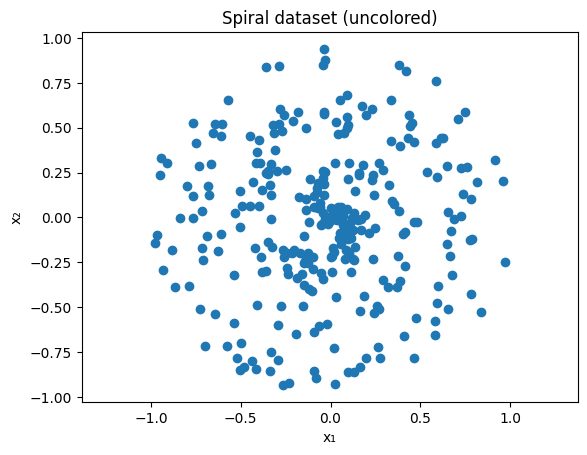

In [5]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.title("Spiral dataset (uncolored)")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.axis("equal")
plt.show()

### 2.2 Spiral dataset colored by class

Now we'll color points according to their class labels `y`. The model **won't** see these colors;
it only gets the numeric coordinates and class labels. The color is for us humans to see the
structure of the problem.

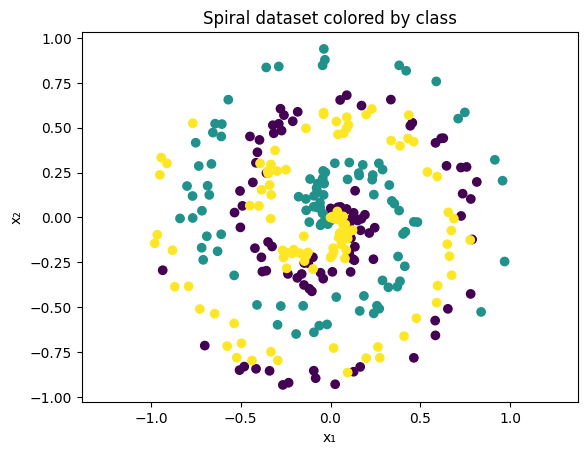

In [8]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Spiral dataset colored by class")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.axis("equal")
plt.show()

## 3. Summary

In this notebook we:
- Built and visualized **linear** vs **non‑linear** 1D datasets.
- Saw that a straight line works well for linear data but fails on curved patterns.
- Generated a **spiral** dataset using the `nnfs` package and visualized it in 2D.

This spiral dataset will be our running example for training and evaluating the neural
network in the rest of the chapter.